In [3]:
# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For reproducibility
np.random.seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
 

from keras.preprocessing.image import ImageDataGenerator


2023-01-09 22:27:03.387212: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
pwd

'/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project) *Part 2 - multi classification'

In [5]:
cd Train Set

/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project) *Part 2 - multi classification/Train Set


# Training Set

In [6]:
train_gen = ImageDataGenerator(rescale = 1/255.)


In [7]:
train_data = train_gen.flow_from_directory('/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project) *Part 2 - multi classification/Train Set')

Found 724 images belonging to 3 classes.


# Testing Set

In [8]:
test_data = train_gen.flow_from_directory('/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project) *Part 2 - multi classification/Test Set')

Found 220 images belonging to 3 classes.


# Data Cleaning

In [9]:
cd Train Set

[Errno 2] No such file or directory: 'Train Set'
/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project) *Part 2 - multi classification/Train Set


In [193]:
ls -a

./   ../  DR/  MH/  ODC/


In [194]:
rm -rf .ipynb_checkpoints/

In [195]:
ls -a

./   ../  DR/  MH/  ODC/


In [196]:
cd ..


/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project) *Part 2 - multi classification


In [197]:
cd Test Set

/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project) *Part 2 - multi classification/Test Set


In [198]:
ls -a

./   ../  DR/  MH/  ODC/


In [199]:
rm -rf .ipynb_checkpoints/

In [200]:
ls -a

./   ../  DR/  MH/  ODC/


# Data Augmentation

In [244]:
train_augmented = ImageDataGenerator(rescale = 1/255.,
                                     shear_range= 0.1,
                                     zoom_range= 0.2,
                                     horizontal_flip = True,
                                     vertical_flip = True)

In [245]:
train_data_augmented = train_augmented.flow_from_directory('/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project) *Part 2 - multi classification/Train Set')

Found 724 images belonging to 3 classes.


In [246]:
test_augmented = ImageDataGenerator(rescale = 1/255.)

In [247]:
test_data_augmented = test_augmented.flow_from_directory('/Users/kamwingsze/GA/project-capstone (Illuminado Capstone Project) *Part 2 - multi classification/Test Set')

Found 220 images belonging to 3 classes.


# 1. Tesing Out Prebuilt Networks -  InceptionV3 as convolution base

In [248]:
from keras.applications import MobileNetV2, VGG16, InceptionV3, Xception
from keras import metrics

In [282]:
conv_base = InceptionV3(include_top = False, input_shape = (1424, 2144, 3), weights = 'imagenet')

In [283]:
from keras.utils import plot_model

In [284]:
plot_model(conv_base)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# X-train, X-test, y-train, y-test

In [252]:
X_train = conv_base.predict(train_data_augmented)

23/23 [==============================] - 89s 4s/step


In [253]:
X_test = conv_base.predict(test_data_augmented)

7/7 [==============================] - 17s 2s/step


In [254]:
y_train = train_data_augmented.labels

In [255]:
y_test = test_data_augmented.labels

In [256]:
X_train.shape

(724, 6, 6, 2048)

In [257]:
y_train.shape

(724,)

In [258]:
X_test.shape

(220, 6, 6, 2048)

In [259]:
y_test.shape

(220,)

# Putting InceptionV3 in the convolutional network model


In [285]:
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D
from keras.utils import to_categorical
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping

In [286]:
top_layer = Sequential()
top_layer.add(Flatten())
top_layer.add(Dense(3, activation = 'softmax'))

In [287]:
top_layer.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics = ['accuracy']) # precision-recall curve


In [288]:
early_stop = EarlyStopping(monitor = 'val_accuracy', min_delta=0, patience = 10, restore_best_weights=True, verbose=1)

In [290]:
hist = top_layer.fit(X_train, y_train, validation_data = (X_test, y_test) ,epochs=50, verbose=1, callbacks = [early_stop])

Epoch 1/50
23/23 [==============================] - 0s 10ms/step - loss: 1.9846 - accuracy: 0.6257 - val_loss: 3.9429 - val_accuracy: 0.3909
Epoch 2/50
23/23 [==============================] - 0s 8ms/step - loss: 1.1930 - accuracy: 0.7486 - val_loss: 4.5546 - val_accuracy: 0.2864
Epoch 3/50
23/23 [==============================] - 0s 8ms/step - loss: 0.5472 - accuracy: 0.8494 - val_loss: 3.8138 - val_accuracy: 0.4182
Epoch 4/50
23/23 [==============================] - 0s 8ms/step - loss: 0.2433 - accuracy: 0.9185 - val_loss: 3.5543 - val_accuracy: 0.3455
Epoch 5/50
23/23 [==============================] - 0s 8ms/step - loss: 0.1561 - accuracy: 0.9434 - val_loss: 4.2264 - val_accuracy: 0.4000
Epoch 6/50
23/23 [==============================] - 0s 8ms/step - loss: 0.0300 - accuracy: 0.9890 - val_loss: 3.3030 - val_accuracy: 0.3818
Epoch 7/50
23/23 [==============================] - 0s 8ms/step - loss: 0.0146 - accuracy: 0.9972 - val_loss: 3.3275 - val_accuracy: 0.3955
Epoch 8/50
23/23 [=

{'verbose': 1, 'epochs': 50, 'steps': 23}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


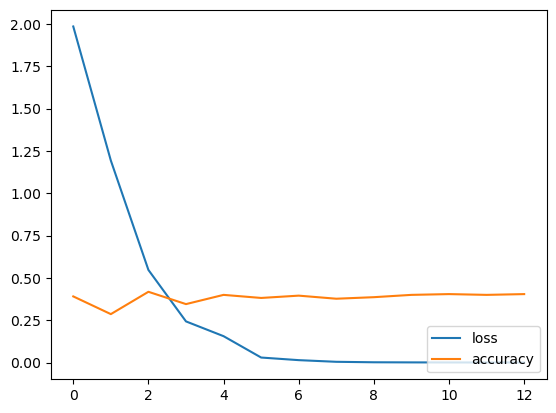

In [291]:
print(hist.params)
print(hist.history.keys())
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_accuracy'], label = 'accuracy')
plt.legend(loc = 'lower right');

# Prediction

In [292]:
pred = top_layer.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [293]:
pred = pd.DataFrame(pred)

In [294]:
pred

,0,1,2
0,0.965900,0.029314,4.785421e-03
1,0.010896,0.409491,5.796126e-01
2,0.994472,0.005528,1.711059e-08
3,0.008601,0.983658,7.741389e-03
4,0.408783,0.051993,5.392233e-01
...,...,...,...
215,0.125409,0.869957,4.633423e-03
216,0.857738,0.134226,8.035735e-03
217,0.999361,0.000638,8.123582e-07
218,0.982370,0.017573,5.726310e-05


In [295]:
def return_to_index(row):
    return row.idxmax()

In [296]:
pred = pred.apply(return_to_index, axis = 1) #passing each row into function at one time

In [297]:
(y_test == 0).mean()

0.4727272727272727

In [298]:
(y_test == 1).mean()

0.38181818181818183

In [299]:
(y_test == 2).mean()

0.14545454545454545

In [300]:
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

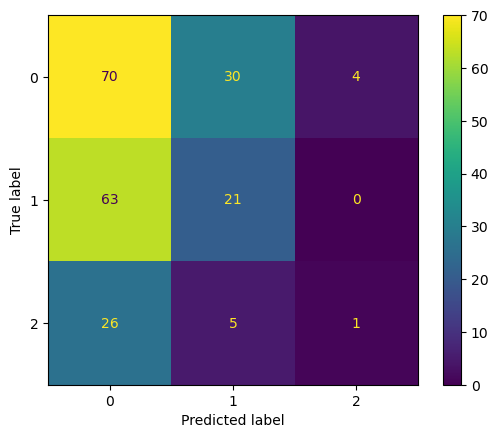

In [301]:
confusion_matrix = metrics.confusion_matrix(y_test, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()

# 2. Tesing Out Prebuilt Networks -  Xception as convolution base

In [276]:
# 2. Tesing Out Prebuilt Networks -  Xception as convolution base
from keras.applications import Xception
conv_base = Xception(include_top = False, input_shape = (1424, 2144, 3), weights = 'imagenet')
from keras.utils import plot_model
plot_model(conv_base)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Putting Xception to work


In [277]:
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D
from keras.utils import to_categorical
from keras import metrics

In [278]:
top_layer = Sequential()
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Dropout(0.2))
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Flatten())
top_layer.add(Dense(512,activation="relu"))
top_layer.add(Dense(3, activation = 'softmax'))

In [279]:
top_layer.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics = ['accuracy']) # precision-recall curve


In [280]:
early_stop = EarlyStopping(monitor = 'val_accuracy', min_delta=0, patience = 10, restore_best_weights=True, verbose=1)

In [281]:
hist = top_layer.fit(X_train, y_train, validation_data = (X_test, y_test) ,epochs=50, verbose=1, callbacks = [early_stop])

Epoch 1/50
23/23 [==============================] - 3s 56ms/step - loss: 1.0535 - accuracy: 0.4323 - val_loss: 1.0127 - val_accuracy: 0.4727
Epoch 2/50
23/23 [==============================] - 1s 39ms/step - loss: 1.0325 - accuracy: 0.4599 - val_loss: 1.0301 - val_accuracy: 0.3818
Epoch 3/50
23/23 [==============================] - 1s 40ms/step - loss: 1.0241 - accuracy: 0.4641 - val_loss: 1.0161 - val_accuracy: 0.4727
Epoch 4/50
23/23 [==============================] - 1s 39ms/step - loss: 1.0387 - accuracy: 0.4544 - val_loss: 1.0204 - val_accuracy: 0.4727
Epoch 5/50
23/23 [==============================] - 1s 39ms/step - loss: 1.0427 - accuracy: 0.4710 - val_loss: 1.0224 - val_accuracy: 0.4636
Epoch 6/50
23/23 [==============================] - 1s 40ms/step - loss: 1.0094 - accuracy: 0.4779 - val_loss: 1.0212 - val_accuracy: 0.5091
Epoch 7/50
23/23 [==============================] - 1s 39ms/step - loss: 0.9974 - accuracy: 0.5000 - val_loss: 1.0231 - val_accuracy: 0.4773
Epoch 8/50
23

{'verbose': 1, 'epochs': 50, 'steps': 23}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


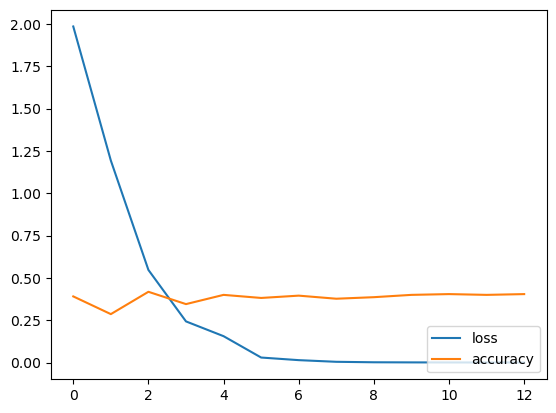

In [302]:
print(hist.params)
print(hist.history.keys())
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_accuracy'], label = 'accuracy')
plt.legend(loc = 'lower right');

# Prediction

In [303]:
pred = top_layer.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [304]:
pred = pd.DataFrame(pred)

In [305]:
def return_to_index(row):
    return row.idxmax()

In [306]:
pred = pred.apply(return_to_index, axis = 1) #passing each row into function at one time

In [307]:
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

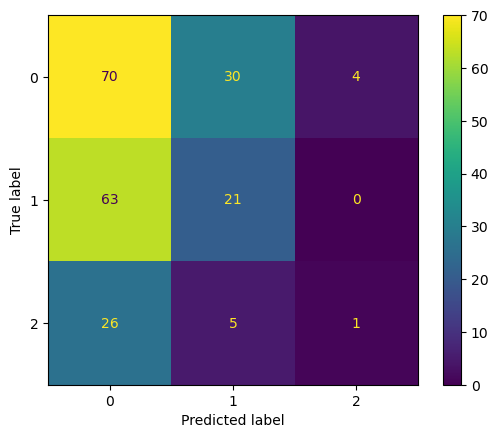

In [308]:
confusion_matrix = metrics.confusion_matrix(y_test, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()

# 3. Tesing Out Prebuilt Networks -  VGG16 as convolution base


In [309]:
from keras.applications import VGG16
conv_base = VGG16(include_top = False, input_shape = (1424, 2144, 3), weights = 'imagenet')
from keras.utils import plot_model
plot_model(conv_base)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [310]:
# Putting VGG16 to work

In [311]:
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D
from keras.utils import to_categorical
from keras import metrics

In [312]:
top_layer = Sequential()
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Dropout(0.2))
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Flatten())
top_layer.add(Dense(512,activation="relu"))
top_layer.add(Dense(3, activation = 'softmax'))

In [313]:
top_layer.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics = ['accuracy']) # precision-recall curve


In [314]:
early_stop = EarlyStopping(monitor = 'val_accuracy', min_delta=0, patience = 10, restore_best_weights=True, verbose=1)

In [315]:
hist = top_layer.fit(X_train, y_train, validation_data = (X_test, y_test) ,epochs=50, verbose=1, callbacks = [early_stop])

Epoch 1/20
23/23 [==============================] - 2s 46ms/step - loss: 1.6458 - accuracy: 0.4033 - val_loss: 1.0135 - val_accuracy: 0.4318
Epoch 2/20
23/23 [==============================] - 1s 35ms/step - loss: 1.0300 - accuracy: 0.4793 - val_loss: 1.0276 - val_accuracy: 0.3818
Epoch 3/20
23/23 [==============================] - 1s 36ms/step - loss: 1.0076 - accuracy: 0.4710 - val_loss: 1.0415 - val_accuracy: 0.3909
Epoch 4/20
23/23 [==============================] - 1s 36ms/step - loss: 0.9911 - accuracy: 0.4986 - val_loss: 1.0231 - val_accuracy: 0.4545
Epoch 5/20
23/23 [==============================] - 1s 36ms/step - loss: 0.9526 - accuracy: 0.5083 - val_loss: 1.0569 - val_accuracy: 0.3773
Epoch 6/20
23/23 [==============================] - 1s 36ms/step - loss: 0.8916 - accuracy: 0.5442 - val_loss: 1.0315 - val_accuracy: 0.4455
Epoch 7/20
23/23 [==============================] - 1s 35ms/step - loss: 0.8047 - accuracy: 0.6160 - val_loss: 1.1663 - val_accuracy: 0.3591
Epoch 8/20
23

{'verbose': 1, 'epochs': 20, 'steps': 23}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


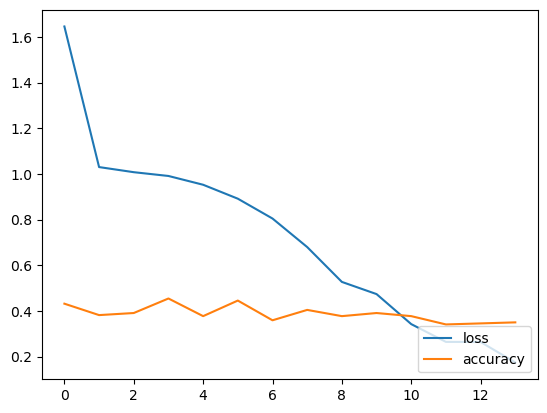

In [316]:
print(hist.params)
print(hist.history.keys())
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_accuracy'], label = 'accuracy')
plt.legend(loc = 'lower right');

# Prediction

In [317]:
pred = top_layer.predict(X_test)

7/7 [==============================] - 0s 7ms/step


In [318]:
pred = pd.DataFrame(pred)

In [319]:
def return_to_index(row):
    return row.idxmax()

In [320]:
pred = pred.apply(return_to_index, axis = 1) #passing each row into function at one time

In [321]:
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

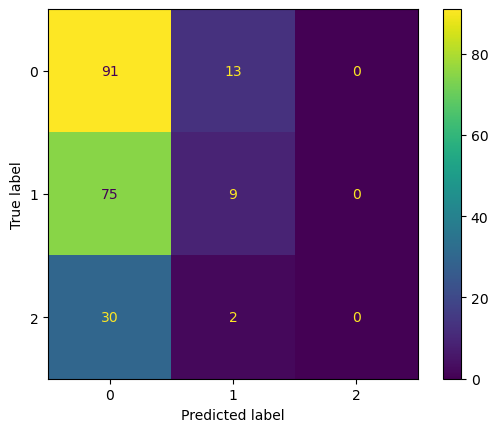

In [322]:
confusion_matrix = metrics.confusion_matrix(y_test, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()

# 4. Tesing Out Prebuilt Networks -  MobileNetV2 as convolution base

In [323]:

from keras.applications import MobileNetV2
conv_base = MobileNetV2(include_top = False, input_shape = (1424, 2144, 3), weights = 'imagenet')
from keras.utils import plot_model
plot_model(conv_base)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Putting MobileNetV2 to work

In [324]:
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D
from keras.utils import to_categorical

In [325]:
top_layer = Sequential()
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Dropout(0.2))
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Flatten())
top_layer.add(Dense(512,activation="relu"))
top_layer.add(Dense(3, activation = 'softmax'))

In [326]:
top_layer.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics = ['accuracy']) # precision-recall curve


In [327]:
early_stop = EarlyStopping(monitor = 'val_accuracy', min_delta=0, patience = 10, restore_best_weights=True, verbose=1)

In [328]:
hist = top_layer.fit(X_train, y_train, validation_data = (X_test, y_test) ,epochs=50, verbose=1, callbacks = [early_stop])

Epoch 1/50
23/23 [==============================] - 2s 46ms/step - loss: 1.2345 - accuracy: 0.4351 - val_loss: 1.0573 - val_accuracy: 0.3955
Epoch 2/50
23/23 [==============================] - 1s 36ms/step - loss: 1.0036 - accuracy: 0.4917 - val_loss: 1.0591 - val_accuracy: 0.3591
Epoch 3/50
23/23 [==============================] - 1s 36ms/step - loss: 1.0040 - accuracy: 0.4848 - val_loss: 1.1059 - val_accuracy: 0.3773
Epoch 4/50
23/23 [==============================] - 1s 36ms/step - loss: 0.9773 - accuracy: 0.5028 - val_loss: 1.0678 - val_accuracy: 0.3955
Epoch 5/50
23/23 [==============================] - 1s 36ms/step - loss: 0.9144 - accuracy: 0.5787 - val_loss: 1.0718 - val_accuracy: 0.4045
Epoch 6/50
23/23 [==============================] - 1s 36ms/step - loss: 0.7960 - accuracy: 0.6616 - val_loss: 1.2641 - val_accuracy: 0.3545
Epoch 7/50
23/23 [==============================] - 1s 36ms/step - loss: 0.6574 - accuracy: 0.7362 - val_loss: 1.3581 - val_accuracy: 0.4364
Epoch 8/50
23

{'verbose': 1, 'epochs': 50, 'steps': 23}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


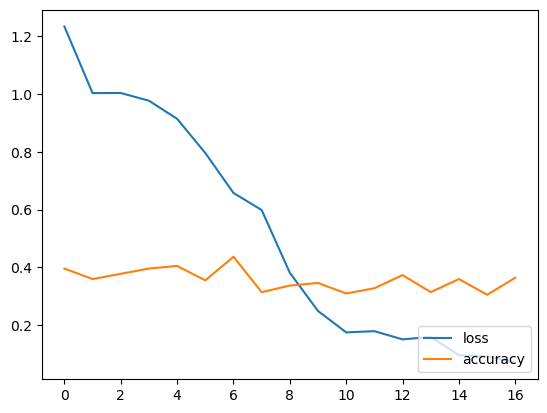

In [329]:
print(hist.params)
print(hist.history.keys())
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_accuracy'], label = 'accuracy')
plt.legend(loc = 'lower right');

# Prediction

In [331]:
pred = top_layer.predict(X_test)

7/7 [==============================] - 0s 8ms/step


In [332]:
pred = pd.DataFrame(pred)

In [333]:
def return_to_index(row):
    return row.idxmax()

In [334]:
pred = pred.apply(return_to_index, axis = 1) #passing each row into function at one time

In [335]:
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

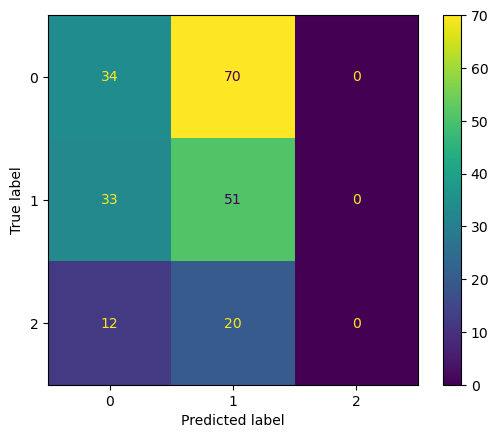

In [336]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()

# 4. Tesing Out Prebuilt Networks -  EfficientNetB5 as convolution base


In [337]:
from keras.applications import EfficientNetB5

In [338]:
conv_base = EfficientNetB5(include_top = False, input_shape = (150, 150, 3))

In [339]:
from keras.utils import plot_model

In [340]:
plot_model(conv_base)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [341]:
# Putting EfficientNetB5 to work

In [342]:
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D
from keras.utils import to_categorical

In [343]:
top_layer = Sequential()
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Dropout(0.2))
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Flatten())
top_layer.add(Dense(512,activation="relu"))
top_layer.add(Dense(3, activation = 'softmax'))

In [344]:
top_layer.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics = ['accuracy']) # precision-recall curve


In [345]:
early_stop = EarlyStopping(monitor = 'val_accuracy', min_delta=0, patience = 10, restore_best_weights=True, verbose=1)

In [346]:
hist = top_layer.fit(X_train, y_train, validation_data = (X_test, y_test) ,epochs=30, verbose=1,callbacks = [early_stop])

Epoch 1/30
23/23 [==============================] - 2s 44ms/step - loss: 1.3636 - accuracy: 0.4075 - val_loss: 1.0433 - val_accuracy: 0.3864
Epoch 2/30
23/23 [==============================] - 1s 35ms/step - loss: 1.0214 - accuracy: 0.4461 - val_loss: 1.0363 - val_accuracy: 0.3773
Epoch 3/30
23/23 [==============================] - 1s 35ms/step - loss: 1.0116 - accuracy: 0.4834 - val_loss: 1.0362 - val_accuracy: 0.3818
Epoch 4/30
23/23 [==============================] - 1s 35ms/step - loss: 0.9867 - accuracy: 0.5138 - val_loss: 1.0406 - val_accuracy: 0.4182
Epoch 5/30
23/23 [==============================] - 1s 35ms/step - loss: 0.9399 - accuracy: 0.5718 - val_loss: 1.0472 - val_accuracy: 0.4227
Epoch 6/30
23/23 [==============================] - 1s 35ms/step - loss: 0.8565 - accuracy: 0.6036 - val_loss: 1.0777 - val_accuracy: 0.4091
Epoch 7/30
23/23 [==============================] - 1s 35ms/step - loss: 0.7554 - accuracy: 0.6685 - val_loss: 1.2772 - val_accuracy: 0.3500
Epoch 8/30
23

{'verbose': 1, 'epochs': 30, 'steps': 23}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


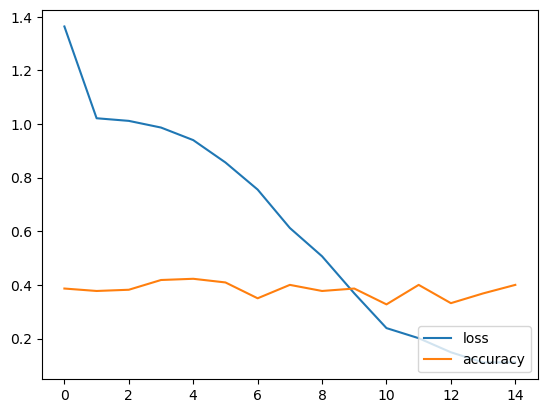

In [355]:
print(hist.params)
print(hist.history.keys())
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_accuracy'], label = 'accuracy')
plt.legend(loc = 'lower right');

In [348]:
# Prediction

In [356]:
pred = top_layer.predict(X_test)

7/7 [==============================] - 0s 8ms/step


In [357]:
pred = pd.DataFrame(pred)

In [358]:
def return_to_index(row):
    return row.idxmax()

In [359]:
pred = pred.apply(return_to_index, axis = 1) #passing each row into function at one time

In [360]:
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

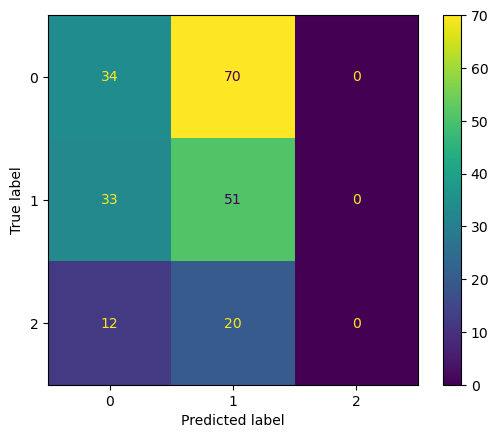

In [361]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()

# Testing out SE-ResNeXt

In [362]:
# for keras
from classification_models.keras import Classifiers

In [363]:
ResNeXt50, preprocess_input = Classifiers.get('resnext50')
model = ResNeXt50(include_top = False, input_shape=(224, 224, 3), weights='imagenet')

In [364]:
# Putting SE-ResNeXt to work

In [365]:
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D
from keras.utils import to_categorical

In [366]:
top_layer = Sequential()
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Dropout(0.2))
top_layer.add(Dense(100, activation = 'relu'))
top_layer.add(Flatten())
top_layer.add(Dense(512,activation="relu"))
top_layer.add(Dense(3, activation = 'softmax'))

In [367]:
top_layer.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics = ['accuracy']) # precision-recall curve


In [368]:
early_stop = EarlyStopping(monitor = 'val_accuracy', min_delta=0, patience = 10, restore_best_weights=True, verbose=1)

In [369]:
hist = top_layer.fit(X_train, y_train, validation_data = (X_test, y_test) ,epochs=30, verbose=1,callbacks = [early_stop])

Epoch 1/30
23/23 [==============================] - 2s 47ms/step - loss: 1.3762 - accuracy: 0.4185 - val_loss: 1.0571 - val_accuracy: 0.4727
Epoch 2/30
23/23 [==============================] - 1s 40ms/step - loss: 1.0245 - accuracy: 0.5069 - val_loss: 1.0252 - val_accuracy: 0.4727
Epoch 3/30
23/23 [==============================] - 1s 37ms/step - loss: 0.9869 - accuracy: 0.4959 - val_loss: 1.0352 - val_accuracy: 0.4182
Epoch 4/30
23/23 [==============================] - 1s 37ms/step - loss: 0.9267 - accuracy: 0.5594 - val_loss: 1.0343 - val_accuracy: 0.4000
Epoch 5/30
23/23 [==============================] - 1s 36ms/step - loss: 0.8370 - accuracy: 0.6077 - val_loss: 1.0885 - val_accuracy: 0.3909
Epoch 6/30
23/23 [==============================] - 1s 36ms/step - loss: 0.7325 - accuracy: 0.6837 - val_loss: 1.1473 - val_accuracy: 0.3909
Epoch 7/30
23/23 [==============================] - 1s 42ms/step - loss: 0.6067 - accuracy: 0.7445 - val_loss: 1.3445 - val_accuracy: 0.3364
Epoch 8/30
23

{'verbose': 1, 'epochs': 30, 'steps': 23}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


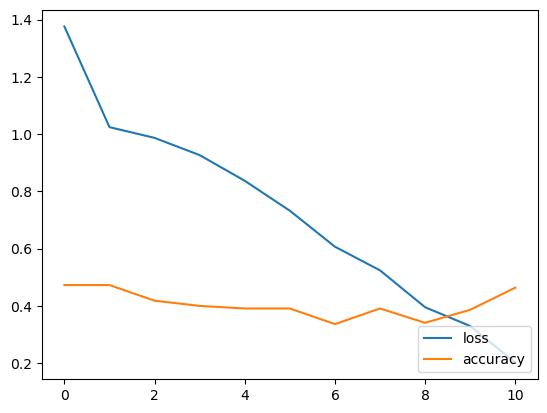

In [370]:
print(hist.params)
print(hist.history.keys())
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_accuracy'], label = 'accuracy')
plt.legend(loc = 'lower right');

In [134]:
# Prediction

In [136]:
pred = top_layer.predict(X_test)

7/7 [==============================] - 0s 7ms/step


In [141]:
pred = pd.DataFrame(pred)
pred

,0,1,2
0,0.576372,0.342958,0.080671
1,0.540711,0.229168,0.230120
2,0.966808,0.012482,0.020709
3,0.680668,0.220859,0.098474
4,0.462226,0.388805,0.148969
...,...,...,...
215,0.678293,0.262837,0.058871
216,0.784855,0.133658,0.081487
217,0.464073,0.433766,0.102161
218,0.491443,0.380220,0.128336


In [142]:
def return_to_index(row):
    return row.idxmax()

In [ ]:
pred = pred.apply(return_to_index, axis = 1) #passing each row into function at one time

In [139]:
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

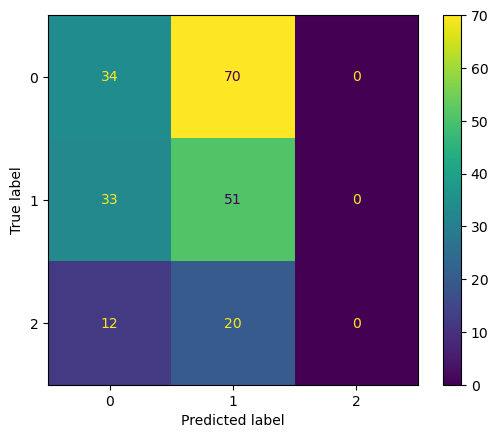

In [140]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()